In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
!pip install kaggle

In [3]:
import opendatasets as od
import os

STEPS:
    1 download kaggle dataset
    2 read csv file and explore the data
    3 create working sample
    4 text preprocess the data with tecniques
        bag of word
        tokenization
        stop word removal
        stemming
    5 ML models for text classification

1 DOWNLOAD CSV DATA

In [4]:
#!kaggle competitions download -c quora-insincere-questions-classification

In [5]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


2 EXPLORE DATA USING PANDAS

In [8]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [9]:
import pandas as pd

In [10]:
raw_df = pd.read_csv(train_fname)
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [11]:
sincere_df = raw_df[raw_df.target ==0]
sincere_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [12]:
insincere_df = raw_df[raw_df.target ==1]
insincere_df

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1
...,...,...,...
1306093,fffeba722d9b371bd1b9,How is it to have intimate relation with your ...,1
1306094,fffee269360dd0d3947a,Why is it when singers have lyrics about voice...,1
1306099,ffff0e4ea1bb6e16feec,Do pakis smell of curry and shit?,1
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1


In [13]:
raw_df.target.value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

<Axes: xlabel='target'>

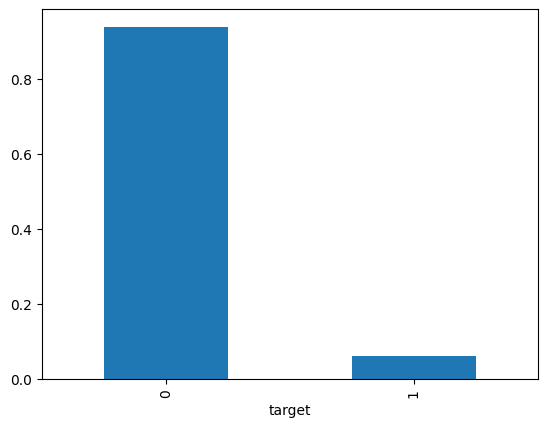

In [14]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [15]:
test_df = pd.read_csv(test_fname)
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [16]:
sub_df = pd.read_csv(sample_fname)
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [17]:
sub_df.prediction.value_counts()

prediction
0    375806
Name: count, dtype: int64

3 Create a working sample

In [18]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


4 Text preprocessing with tecniques 
    bag of words
    tokenization
    stop word removal
    stemming

Bag of words intuition
    1 create a list of all the word of the text csv
    2 convert into a vector with counts of each word

In [19]:
q0 = sincere_df.question_text.values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [20]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

In [21]:
import nltk
from nltk.tokenize import word_tokenize

In [22]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Cássio
[nltk_data]     Berger\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Cássio
[nltk_data]     Berger\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# tokenizing one phrase with nltk
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [24]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [25]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

Stop word removal (remove commonly occuring words)

In [26]:
from nltk.corpus import stopwords

In [27]:
english_stopwords = stopwords.words('english')
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [28]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [29]:
q0_stp = remove_stopwords(q0_tok)
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [30]:
q1_stp = remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

Stemming (raizes das palavras)
    go, gone, going -> go
    birds, bird -> bird

In [31]:
from nltk.stem.snowball import SnowballStemmer

In [32]:
stemmer = SnowballStemmer("english")

In [33]:
stemmer.stem('going')

'go'

In [34]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [35]:
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

#will not be used
Lemmatization (raizes mas normaliza para uma palavra base com sentido)
    'love' -> 'love'
    'loving' -> 'lov' -> 'love'
    'lovable' -> 'lov' -> 'love'

Implement Bag of Words
    create vocabulary with coutn vectorizer
    transformer text to vectors with count vectorizer
    configure text preprocessing in count veztorizer

In [36]:
#small sample to usage
small_df = sample_df[:5]
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [37]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


Create vocabulary

In [38]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#creating vectorizer and training a vocabulary, with 5 questions
small_vec = CountVectorizer()
small_vec.fit(small_df.question_text)

#small_vec.vocabulary_
small_vec.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

Transform documents into vectors

In [40]:
vectors = small_vec.transform(small_df.question_text)
print(vectors.shape)
vectors.toarray()

(5, 51)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]], dtype=int64)

Configure Count vectorizer parameters

In [41]:
stemmer= SnowballStemmer(language='english')

In [42]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [43]:
tokenize('What is the really (deal) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [44]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [45]:
%%time
vectorizer.fit(sample_df.question_text)

C:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: total: 21.1 s
Wall time: 21.4 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x00000211A0BB8400>)

In [46]:
len(vectorizer.vocabulary_)

1000

In [47]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

ready for vectorize 100k questions, the sample

In [48]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: total: 21 s
Wall time: 21.4 s


In [49]:
inputs.shape

(100000, 1000)

In [50]:
inputs

<100000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 548298 stored elements in Compressed Sparse Row format>

In [51]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: total: 1min 18s
Wall time: 1min 20s


In [52]:
test_inputs.shape

(375806, 1000)

In [53]:
test_inputs

<375806x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 2056612 stored elements in Compressed Sparse Row format>

5 Machine Learning models for text classification
    create training and a validation set
    train a logistic regression model
    make predictions on training, validation and test data

create training and a validation set

In [54]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, test_size=0.3, random_state=42)

In [57]:
train_inputs.shape

(70000, 1000)

In [58]:
train_targets.shape

(70000,)

In [59]:
val_inputs.shape

(30000, 1000)

In [60]:
val_targets.shape

(30000,)

Train logistic regression model

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
MAX_ITER=10000
model = LogisticRegression(max_iter=10000, solver='sag')

In [63]:
%%time
model.fit(train_inputs, train_targets)

CPU times: total: 51.6 s
Wall time: 52.4 s


LogisticRegression(max_iter=10000, solver='sag')

Make prediction using the model

In [65]:
train_preds = model.predict(train_inputs)
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
pd.Series(train_preds).value_counts()

0    68018
1     1982
Name: count, dtype: int64

In [67]:
pd.Series(train_targets).value_counts()

target
0    65784
1     4216
Name: count, dtype: int64

In [71]:
from sklearn.metrics import accuracy_score
import numpy as np

In [72]:
accuracy_score(train_targets, train_preds)

0.9513714285714285

In [77]:
# if only prediction 0, would hit 94%
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9397714285714286

In [78]:
from sklearn.metrics import f1_score

In [79]:
f1_score(train_targets, train_preds)

0.45079057760567925

In [80]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

In [81]:
random_preds = np.random.choice((0,1), len(train_targets))
f1_score(train_targets, random_preds)

0.10661997919362615

In [82]:
val_preds = model.predict(val_inputs)

In [83]:
accuracy_score(val_targets, val_preds)

0.9478333333333333

In [84]:
f1_score(val_targets, val_preds)

0.41495327102803736

In [87]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [88]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [90]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [92]:
insincere_df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

Make predictions and submit to kaggle

In [96]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [98]:
test_inputs.shape

(375806, 1000)

In [99]:
test_preds = model.predict(test_inputs)

In [100]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [101]:
sub_df.prediction = test_preds

In [102]:
sub_df.prediction.value_counts()

prediction
0    365240
1     10566
Name: count, dtype: int64

In [103]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [104]:
sub_df.to_csv('submission.csv', index=None)